<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/Pytorch002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch[20/1000], loss: 0.515539
Epoch[40/1000], loss: 0.434402
Epoch[60/1000], loss: 0.377037
Epoch[80/1000], loss: 0.336474
Epoch[100/1000], loss: 0.307785
Epoch[120/1000], loss: 0.287488
Epoch[140/1000], loss: 0.273123
Epoch[160/1000], loss: 0.262949
Epoch[180/1000], loss: 0.255738
Epoch[200/1000], loss: 0.250621
Epoch[220/1000], loss: 0.246983
Epoch[240/1000], loss: 0.244392
Epoch[260/1000], loss: 0.242539
Epoch[280/1000], loss: 0.241209
Epoch[300/1000], loss: 0.240248
Epoch[320/1000], loss: 0.239548
Epoch[340/1000], loss: 0.239033
Epoch[360/1000], loss: 0.238648
Epoch[380/1000], loss: 0.238355
Epoch[400/1000], loss: 0.238128
Epoch[420/1000], loss: 0.237946
Epoch[440/1000], loss: 0.237797
Epoch[460/1000], loss: 0.237671
Epoch[480/1000], loss: 0.237562
Epoch[500/1000], loss: 0.237464
Epoch[520/1000], loss: 0.237374
Epoch[540/1000], loss: 0.237290
Epoch[560/1000], loss: 0.237210
Epoch[580/1000], loss: 0.237133
Epoch[600/1000], loss: 0.237058
Epoch[620/1000], loss: 0.236984
Epoch[640/10

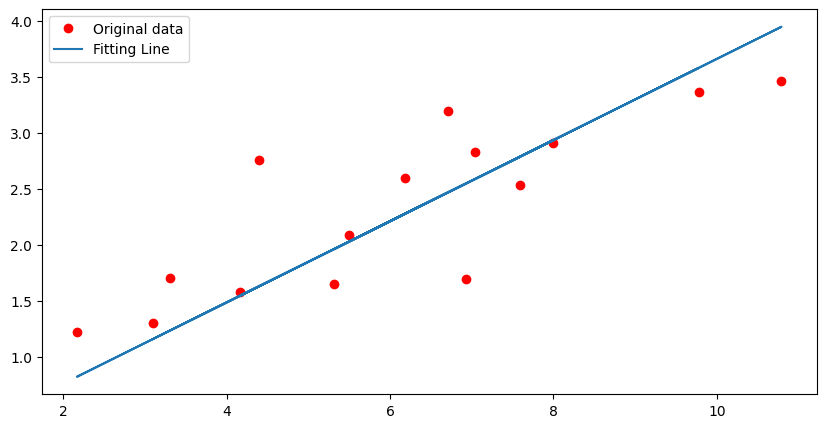

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


x_train = torch.from_numpy(x_train)

y_train = torch.from_numpy(y_train)


# Linear Regression Model
class linearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        #super(linearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = linearRegression()
# 定义loss和优化函数
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

# 开始训练
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = x_train
    target = y_train

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}')

model.eval()
with torch.no_grad():
    predict = model(x_train)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
# 显示图例
plt.legend()
plt.show()

# 保存模型
torch.save(model.state_dict(), './linear.pth')